In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import re


# BSDS Ground Truth Data Manipulation ( .seg)

In [ ]:
def read_seg_file(file_path):
    info = {}
    segmentation_data = []

    with open(file_path, 'r') as file:
        read_segments = False

        for line in file:
            if line.strip() == "data":
                read_segments = True
                continue

            if not read_segments:
                parts = re.split(r'\s+', line.strip(), maxsplit=1)
                if len(parts) == 2:
                    key, value = parts
                    info[key] = int(value) if value.isdigit() else value
                else:
                    print(f"La ligne suivante ne peut pas être correctement divisée : {line}")
            else:
                # Lire les données de segmentation
                segment_data = list(map(int, line.strip().split()))
                segmentation_data.append(segment_data)

    print("info", info)
    print("segmentation_data", segmentation_data)
    return info, segmentation_data

def visualize_segmentation(image_path, segmentation_data):
    # Load the image
    image = plt.imread(image_path)

    # Create an empty mask
    mask = np.zeros_like(image[:, :, 0])

    # Apply segmentation data to the mask
    for segment in segmentation_data:
        s, r, c1, c2 = segment
        mask[r, c1:c2+1] = s
    print("MASK = ", np.unique(mask))
    # Display the image and the segmentation mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image Originale')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='viridis')
    plt.title('Masque de Segmentation')

    plt.show()
    return mask

info {'format': 'ascii cr', 'date': 'Sun Apr 29 16:33:32 2001', 'image': 3096, 'user': 1103, 'width': 481, 'height': 321, 'segments': 2, 'gray': 1, 'invert': 0, 'flipflop': 0}
segmentation_data [[0, 0, 0, 480], [0, 1, 0, 480], [0, 2, 0, 480], [0, 3, 0, 480], [0, 4, 0, 480], [0, 5, 0, 480], [0, 6, 0, 480], [0, 7, 0, 480], [0, 8, 0, 480], [0, 9, 0, 480], [0, 10, 0, 480], [0, 11, 0, 480], [0, 12, 0, 480], [0, 13, 0, 480], [0, 14, 0, 480], [0, 15, 0, 480], [0, 16, 0, 480], [0, 17, 0, 480], [0, 18, 0, 480], [0, 19, 0, 480], [0, 20, 0, 480], [0, 21, 0, 480], [0, 22, 0, 480], [0, 23, 0, 480], [0, 24, 0, 480], [0, 25, 0, 480], [0, 26, 0, 480], [0, 27, 0, 480], [0, 28, 0, 480], [0, 29, 0, 480], [0, 30, 0, 480], [0, 31, 0, 480], [0, 32, 0, 480], [0, 33, 0, 480], [0, 34, 0, 480], [0, 35, 0, 480], [0, 36, 0, 480], [0, 37, 0, 480], [0, 38, 0, 480], [0, 39, 0, 480], [0, 40, 0, 480], [0, 41, 0, 480], [0, 42, 0, 480], [0, 43, 0, 480], [0, 44, 0, 480], [0, 45, 0, 480], [0, 46, 0, 480], [0, 47, 0, 480],

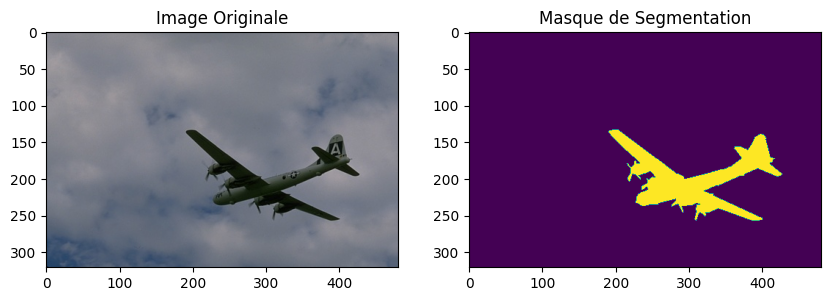

In [ ]:

# Example usage
seg_file_path = '/content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/3096.seg'
image_path = '/content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/3096.jpg'

info, segmentation_data = read_seg_file(seg_file_path)
visualize_segmentation(image_path, segmentation_data)

info {'format': 'ascii cr', 'date': 'Wed Mar 7 12:49:26 2001', 'image': 175043, 'user': 1102, 'width': 481, 'height': 321, 'segments': 3, 'gray': 0, 'invert': 0, 'flipflop': 0}
segmentation_data [[0, 0, 0, 129], [1, 0, 130, 157], [0, 0, 158, 480], [0, 1, 0, 128], [1, 1, 129, 157], [0, 1, 158, 480], [0, 2, 0, 127], [1, 2, 128, 156], [0, 2, 157, 480], [0, 3, 0, 127], [1, 3, 128, 156], [0, 3, 157, 480], [0, 4, 0, 126], [1, 4, 127, 156], [0, 4, 157, 480], [0, 5, 0, 125], [1, 5, 126, 155], [0, 5, 156, 480], [0, 6, 0, 124], [1, 6, 125, 155], [0, 6, 156, 480], [0, 7, 0, 124], [1, 7, 125, 154], [0, 7, 155, 480], [0, 8, 0, 123], [1, 8, 124, 154], [0, 8, 155, 480], [0, 9, 0, 122], [1, 9, 123, 153], [0, 9, 154, 480], [0, 10, 0, 121], [1, 10, 122, 153], [0, 10, 154, 480], [0, 11, 0, 121], [1, 11, 122, 152], [0, 11, 153, 480], [0, 12, 0, 120], [1, 12, 121, 152], [0, 12, 153, 480], [0, 13, 0, 119], [1, 13, 120, 151], [0, 13, 152, 480], [0, 14, 0, 118], [1, 14, 119, 151], [0, 14, 152, 480], [0, 15, 0

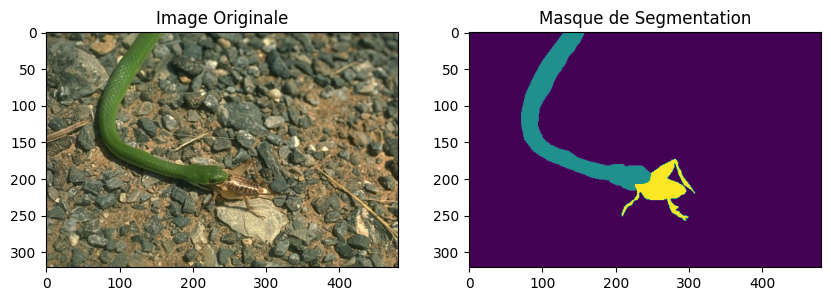

In [ ]:
# Example usage
seg_file_path = '/content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/serp.seg'
image_path = '/content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/serp.jpg'

info, segmentation_data = read_seg_file(seg_file_path)
visualize_segmentation(image_path, segmentation_data)

info {'format': 'ascii cr', 'date': 'Thu Sep 13 18:40:04 2001', 'image': 113016, 'user': 1130, 'width': 481, 'height': 321, 'segments': 4, 'gray': 1, 'invert': 0, 'flipflop': 0}
segmentation_data [[0, 0, 0, 480], [0, 1, 0, 480], [0, 2, 0, 480], [0, 3, 0, 480], [0, 4, 0, 480], [0, 5, 0, 480], [0, 6, 0, 480], [0, 7, 0, 480], [0, 8, 0, 480], [0, 9, 0, 480], [0, 10, 0, 480], [0, 11, 0, 480], [0, 12, 0, 480], [0, 13, 0, 480], [0, 14, 0, 480], [0, 15, 0, 480], [0, 16, 0, 480], [0, 17, 0, 480], [0, 18, 0, 480], [0, 19, 0, 480], [0, 20, 0, 480], [0, 21, 0, 113], [1, 21, 114, 119], [0, 21, 120, 480], [0, 22, 0, 113], [1, 22, 114, 119], [0, 22, 120, 132], [1, 22, 133, 133], [0, 22, 134, 480], [0, 23, 0, 112], [1, 23, 113, 119], [0, 23, 120, 132], [1, 23, 133, 136], [0, 23, 137, 480], [0, 24, 0, 112], [1, 24, 113, 119], [0, 24, 120, 132], [1, 24, 133, 137], [0, 24, 138, 480], [0, 25, 0, 112], [1, 25, 113, 119], [0, 25, 120, 132], [1, 25, 133, 139], [0, 25, 140, 480], [0, 26, 0, 112], [1, 26, 113,

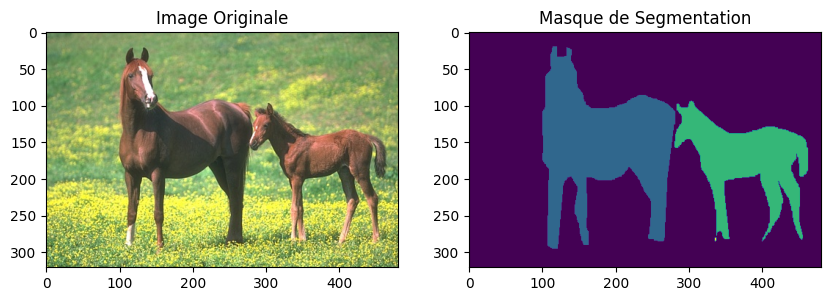

In [ ]:
# Example usage
seg_file_path = '/content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/horses2.seg'
image_path = '//content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/horses2.jpg'

info, segmentation_data = read_seg_file(seg_file_path)
mask = visualize_segmentation(image_path, segmentation_data)

In [ ]:
mask.shape

(321, 481)

In [ ]:
for i in range(mask.shape[0]):
  for j in range(mask.shape[1]):
    if mask[i][j] == 2 or mask[i][j] == 3:
        mask[i][j] = 1

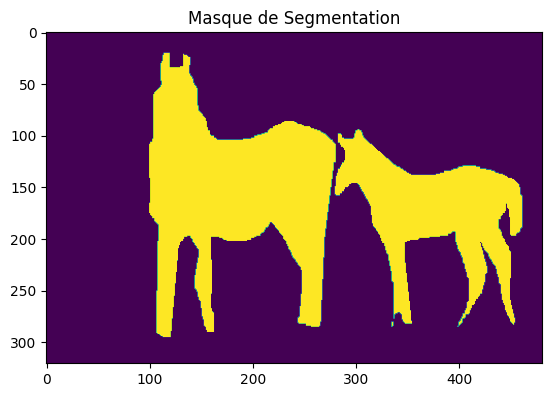

In [ ]:
plt.imshow(mask, cmap='viridis')
plt.title('Masque de Segmentation')

plt.show()

info {'format': 'ascii cr', 'date': 'Thu Jun 21 13:13:42 2001', 'image': 113044, 'user': 1112, 'width': 481, 'height': 321, 'segments': 5, 'gray': 0, 'invert': 0, 'flipflop': 0}
segmentation_data [[0, 0, 0, 480], [0, 1, 0, 480], [0, 2, 0, 480], [0, 3, 0, 480], [0, 4, 0, 480], [0, 5, 0, 480], [0, 6, 0, 480], [0, 7, 0, 350], [1, 7, 351, 352], [0, 7, 353, 357], [1, 7, 358, 358], [0, 7, 359, 480], [0, 8, 0, 349], [1, 8, 350, 352], [0, 8, 353, 356], [1, 8, 357, 358], [0, 8, 359, 480], [0, 9, 0, 348], [1, 9, 349, 351], [0, 9, 352, 356], [1, 9, 357, 358], [0, 9, 359, 480], [0, 10, 0, 348], [1, 10, 349, 351], [0, 10, 352, 356], [1, 10, 357, 358], [0, 10, 359, 480], [0, 11, 0, 347], [1, 11, 348, 351], [0, 11, 352, 356], [1, 11, 357, 359], [0, 11, 360, 480], [0, 12, 0, 347], [1, 12, 348, 351], [0, 12, 352, 355], [1, 12, 356, 359], [0, 12, 360, 480], [0, 13, 0, 346], [1, 13, 347, 351], [0, 13, 352, 354], [1, 13, 355, 359], [0, 13, 360, 480], [0, 14, 0, 345], [1, 14, 346, 351], [0, 14, 352, 353], 

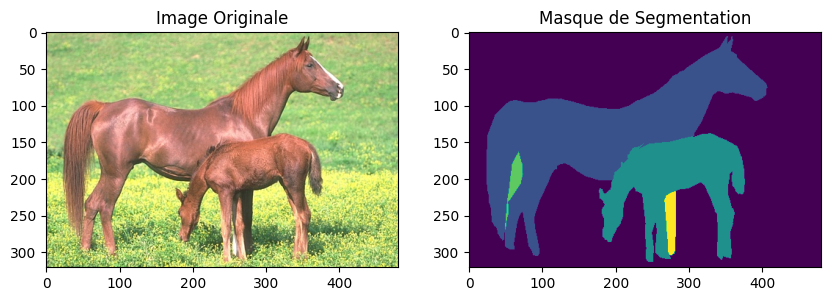

In [ ]:
# Example usage
seg_file_path = '/content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/horses.seg'
image_path = '//content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/horses.jpg'

info, segmentation_data = read_seg_file(seg_file_path)
mask = visualize_segmentation(image_path, segmentation_data)

In [ ]:
for i in range(mask.shape[0]):
  for j in range(mask.shape[1]):
    if mask[i][j] == 2 :
        mask[i][j] = 1
    if mask[i][j] == 3 or mask[i][j] == 4:
        mask[i][j] = 0


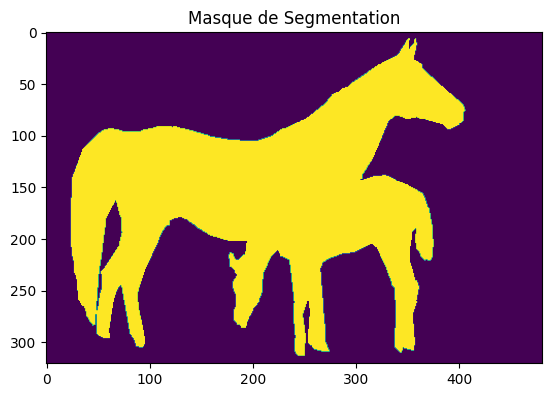

In [ ]:
plt.imshow(mask, cmap='viridis')
plt.title('Masque de Segmentation')

plt.show()

In [ ]:
print(mask.shape)
maskk = np.reshape(mask,(mask.shape[0] * mask.shape[1]))
print(maskk.shape)

(321, 481)
(154401,)


In [ ]:
np.unique(maskk)

array([0, 1], dtype=uint8)

# MRI data Manipulation ( .raws )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_raws_file(file_path, dimensions):
    # Lecture du fichier .raws
    with open(file_path, 'rb') as file:
        raw_data = np.fromfile(file, dtype=np.uint16)

    # Remodelage des données en fonction des dimensions spécifiées
    reshaped_data = raw_data.reshape(dimensions, order='F')
    return reshaped_data

def display_mri_image(image_data, slice_number):
    # Affichage de l'image MRI pour une coupe spécifiée
    plt.imshow(image_data[:, :, slice_number], cmap='gray')
    plt.title(f'MRI Slice {slice_number}')
    plt.colorbar()
    plt.show()



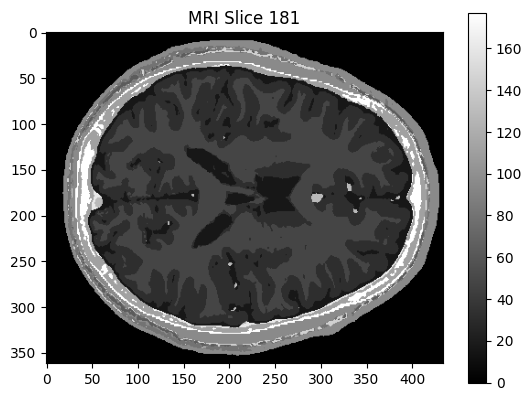

[  0  16  32  48  64  80  96 112 128 145 161 177]


In [ ]:
# Spécifiez le chemin du fichier .raws et les dimensions de l'image MRI
file_path = '/content/drive/MyDrive/Colab Notebooks/Projet Modélisation Vision/BSDS/subject04_crisp_v.raws'
image_dimensions = (362, 434, 362)  # Remplacez par les dimensions correctes de votre image

# Lire le fichier .raws
mri_data = read_raws_file(file_path, image_dimensions)

# Afficher une coupe de l'image MRI (par exemple, la coupe du milieu)
slice_to_display = image_dimensions[2] // 2
display_mri_image(mri_data, 181)


print(np.unique(mri_data[: , : ,180]))
